<a href="https://colab.research.google.com/github/laraccano84/Mentoria_mumuki/blob/main/analisis_mumuki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn 
import datetime as dt
import requests
import json
import math
import glob
import cufflinks as cf



In [119]:
pip install pandas_bokeh

In [120]:
import pandas_bokeh


In [6]:
url= 'https://raw.githubusercontent.com/Natali-PP/diplodatos2021/main/mentoria/python_submissions.csv'
df = pd.read_csv(url)

In [9]:
sns  = seaborn

In [10]:
df[:3]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."


In [121]:
pandas_bokeh.output_notebook()

**Modificaciones al data:**


1.   Creación de columnas para datos de tiempo (año, mes, dia, hora) 

2.   Creación de funcion para asignar dos categorias de resultados: Paso y no paso.
3. Unificacion de nombres de los ejercicios que aparecen en el 2020 y 2019. 



In [12]:
df['date']= pd.to_datetime(df['submission_created_at']).dt.date
df['time']= pd.to_datetime(df['submission_created_at']).dt.time

In [13]:
df['Month'] = pd.DatetimeIndex(df['submission_created_at']).month
df['Year'] = pd.DatetimeIndex(df['submission_created_at']).year

In [14]:
df['DayName'] =pd.to_datetime(df['submission_created_at']).dt.day_name()

In [15]:
df['Periodo'] =pd.to_datetime(df['submission_created_at']).dt.to_period("M")

In [16]:
df['Hora'] =pd.to_datetime(df['submission_created_at']).dt.hour

In [17]:
df.shape

(47183, 20)

In [18]:
df_conj=df.groupby(['student_uid','date']).agg({'exercise_name':'count'})#,'date':'min','date':'max','date':'std'})

In [19]:
filtered_values = df[df['submission_status'].notnull()]

In [20]:
df

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,date,time,Month,Year,DayName,Periodo,Hora
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2019-08-30,13:17:17.700000,8,2019,Friday,2019-08,13
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2019-09-04,01:29:22.351000,9,2019,Wednesday,2019-09,1
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",2019-09-04,02:53:01.099000,9,2019,Wednesday,2019-09,2
3,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3,78,def Mitas(numero):\r\n return numero / 2\r\n,2019-09-04 02:53:24.673,failed,1,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",2019-09-04,02:53:24.673000,9,2019,Wednesday,2019-09,2
4,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,4,78,def mitad (numero):\r\n return numero / 2\r\n,2019-09-04 02:53:41.949,passed,2,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2019-09-04,02:53:41.949000,9,2019,Wednesday,2019-09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47178,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,348,NaN,2020-11-08 22:03:56.946,passed,0,NaN,2020-11-08,22:03:56.946000,11,2020,Sunday,2020-11,22
47179,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,351,NaN,2020-11-12 11:10:08.054,passed,0,NaN,2020-11-12,11:10:08.054000,11,2020,Thursday,2020-11,11
47180,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,316,NaN,2020-11-12 13:56:29.344,passed,0,NaN,2020-11-12,13:56:29.344000,11,2020,Thursday,2020-11,13
47181,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,347,NaN,2020-11-16 18:22:54.768,passed,0,NaN,2020-11-16,18:22:54.768000,11,2020,Monday,2020-11,18


 **Se crea una columna Estatus donde el valor 1 equivale a paso y 0 equivale a no paso.**

In [33]:
def set_status(submission_status):
    if submission_status == ('paso'):
        return 1
    if submission_status == ('no_paso' or 'pending' or 'aborted' ):
        return 0
 

In [34]:
df['Estatus'] = df['submission_status'].apply(set_status) 

In [23]:
def set_status_paso(submission_status):
    if submission_status == ('paso'):
        return 1

In [24]:
df['Paso'] = df['submission_status'].apply(set_status_paso) 

In [25]:
def set_status_no_paso(submission_status):
    if submission_status == ('no_paso' or 'pending' or 'aborted'):
        return 1

In [26]:
df['No_Paso'] = df['submission_status'].apply(set_status_no_paso) 

In [27]:
url_first_lesson = 'https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-funciones-tipos-de-datos'
data_first_lesson = requests.get(url_first_lesson)
available_data_first_lesson = data_first_lesson.json()

first_lesson_exercises=[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data_first_lesson['exercises'])]

url_third_lesson = 'https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-variables-y-procedimientos'
data_third_lesson = requests.get(url_third_lesson)
available_data_third_lesson = data_third_lesson.json()

third_lesson_exercises=[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data_third_lesson['exercises'])]

In [28]:
df['exercise_name'] = df['exercise_name'].replace(
      {'Calefones': 'Calefones / Poniendo topes',
       'Poniendo topes': 'Calefones / Poniendo topes'})

In [29]:
df['exercise_name'] = df['exercise_name'].replace(
      {'PIenso que así es más fácil':'Pienso que así es más fácil', 
       '¿Es par?':'Libros de la buena memoria', 
       'Más booleanos' :'El retorno del booleano'
       })

In [30]:
df['exercise_name'] = df['exercise_name'].replace(
      {'Funciones, declaración': 'Funciones, declaración / No tan distintos','No tan distintos': 'Funciones, declaración / No tan distintos' })

In [31]:
df["submission_status"] = df["submission_status"].replace({"failed": "no_paso", "passed": "paso", "errored": "no_paso", "passed_with_warnings": "no_paso",  "aborted": "no_paso", "pending": "no_paso"
                          })

In [35]:
df[5:]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,date,time,Month,Year,DayName,Periodo,Hora,Estatus,Paso,No_Paso
5,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,5,79,def mitad(numero):\r\n return numero/2,2019-09-05 14:24:31.797,paso,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2019-09-05,14:24:31.797000,9,2019,Thursday,2019-09,14,1,None,None
6,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,6,80,def doble(numero):\r\n return 2 * numero\r\n,2019-09-23 12:21:30.215,no_paso,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",2019-09-23,12:21:30.215000,9,2019,Monday,2019-09,12,0,None,None
7,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 8\n def doble(50...",7,80,def doble(50):\r\n return 2 / 50\r\n\r\n,2019-09-23 12:22:29.885,no_paso,1,[],2019-09-23,12:22:29.885000,9,2019,Monday,2019-09,12,0,None,None
8,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 8\n def doble(50...",8,80,def doble(50):\r\n return 2 / 50\r\nfunction ...,2019-09-23 12:23:42.243,no_paso,2,[],2019-09-23,12:23:42.243000,9,2019,Monday,2019-09,12,0,None,None
9,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 8\n def mitad(10...",9,80,def mitad(100) :\r\n return 2 / 100\r\n\r\n\r\n,2019-09-23 12:24:36.266,no_paso,3,[],2019-09-23,12:24:36.266000,9,2019,Monday,2019-09,12,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47178,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,348,NaN,2020-11-08 22:03:56.946,paso,0,NaN,2020-11-08,22:03:56.946000,11,2020,Sunday,2020-11,22,1,None,None
47179,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,351,NaN,2020-11-12 11:10:08.054,paso,0,NaN,2020-11-12,11:10:08.054000,11,2020,Thursday,2020-11,11,1,None,None
47180,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,316,NaN,2020-11-12 13:56:29.344,paso,0,NaN,2020-11-12,13:56:29.344000,11,2020,Thursday,2020-11,13,1,None,None
47181,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,347,NaN,2020-11-16 18:22:54.768,paso,0,NaN,2020-11-16,18:22:54.768000,11,2020,Monday,2020-11,18,1,None,None


**Analisis de los datos** :
Conociendo el data frame


Se define arbitrariamente los intentos de realizar el ultimo ejercicio de cada leccion, para luego identificar la cantidad  de alumnos llegaron al final del recorrido de esa lección y lo aprobaron. 
Para eso se realiza la siguiente funcion:

In [36]:
def set_leccion_realizada(exercise_name):
    if (exercise_name == ('Datos de todo tipo' or 'Poniendo topes')):
        return 'Llego al final de la leccion Uno'
    if (exercise_name == ('¿Está cerca?')):
        return 'Llego al final de la leccion Dos'
    if (exercise_name == ('Esto no tiene valor')):
        return 'Llego al final de la leccion Tres'
  
    

In [37]:
df['Lecciones_completas'] = df['exercise_name'].apply(set_leccion_realizada) 

In [38]:
df

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,date,time,Month,Year,DayName,Periodo,Hora,Estatus,Paso,No_Paso,Lecciones_completas
0,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,paso,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2019-08-30,13:17:17.700000,8,2019,Friday,2019-08,13,1,None,None,None
1,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,paso,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2019-09-04,01:29:22.351000,9,2019,Wednesday,2019-09,1,1,None,None,None
2,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,no_paso,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",2019-09-04,02:53:01.099000,9,2019,Wednesday,2019-09,2,0,None,None,None
3,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3,78,def Mitas(numero):\r\n return numero / 2\r\n,2019-09-04 02:53:24.673,no_paso,1,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",2019-09-04,02:53:24.673000,9,2019,Wednesday,2019-09,2,0,None,None,None
4,1,"Funciones, declaración / No tan distintos",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,4,78,def mitad (numero):\r\n return numero / 2\r\n,2019-09-04 02:53:41.949,paso,2,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2019-09-04,02:53:41.949000,9,2019,Wednesday,2019-09,2,1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47178,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,348,NaN,2020-11-08 22:03:56.946,paso,0,NaN,2020-11-08,22:03:56.946000,11,2020,Sunday,2020-11,22,1,None,None,Llego al final de la leccion Tres
47179,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,351,NaN,2020-11-12 11:10:08.054,paso,0,NaN,2020-11-12,11:10:08.054000,11,2020,Thursday,2020-11,11,1,None,None,Llego al final de la leccion Tres
47180,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,316,NaN,2020-11-12 13:56:29.344,paso,0,NaN,2020-11-12,13:56:29.344000,11,2020,Thursday,2020-11,13,1,None,None,Llego al final de la leccion Tres
47181,14,Esto no tiene valor,[],NaN,mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,347,NaN,2020-11-16 18:22:54.768,paso,0,NaN,2020-11-16,18:22:54.768000,11,2020,Monday,2020-11,18,1,None,None,Llego al final de la leccion Tres


In [39]:
freq_by_lecciones = (df.groupby("Lecciones_completas").agg(frequency=("Lecciones_completas", "count")))
print(freq_by_lecciones)

                                   frequency
Lecciones_completas                         
Llego al final de la leccion Dos        1197
Llego al final de la leccion Tres        378
Llego al final de la leccion Uno        1331


In [123]:
freq_by_lecciones.plot_bokeh(kind='barh',stacked=True);

In [43]:
# Agrupando por estatus podemos indertificar de estos cuantos aprobaron el ultimo ejercicio de cada leccion.

df_conj3=df.groupby(['Estatus','Lecciones_completas']).agg({'student_uid':'count'})
print(df_conj3)

                                           student_uid
Estatus Lecciones_completas                           
0       Llego al final de la leccion Dos           987
        Llego al final de la leccion Uno          1152
1       Llego al final de la leccion Dos           210
        Llego al final de la leccion Tres          378
        Llego al final de la leccion Uno           179


In [44]:
#De estos datos se pueden observar que el 100% de quienes llegan al ultimo ejercicio de la leccion 3 lo aprueban.

In [45]:
rating_lecc = df.groupby('Lecciones_completas').size().div(len(df.Estatus))
print(rating_lecc)

Lecciones_completas
Llego al final de la leccion Dos     0.025369
Llego al final de la leccion Tres    0.008011
Llego al final de la leccion Uno     0.028209
dtype: float64


In [124]:
df_conj3.plot_bokeh(kind='barh',stacked=True);

In [47]:
# Cantidad de envios para cada condicion.

df['Lecciones_completas'].describe()


count                                 2906
unique                                   3
top       Llego al final de la leccion Uno
freq                                  1331
Name: Lecciones_completas, dtype: object

In [49]:
#Frecuencia de estatus por intentos
freq_estatus_envio = df['submission_status'].value_counts() 
print(freq_estatus_envio) 

no_paso    33664
paso       13519
Name: submission_status, dtype: int64


In [48]:
# Relacion de los intentos por estatus
rating_probs = df.groupby('submission_status').size().div(len(df))
print(rating_probs)


submission_status
no_paso    0.713477
paso       0.286523
dtype: float64


In [50]:
# Relacion porcentual de los intentos por estatus
100 * df['submission_status'].value_counts() / len(df['submission_status'])


no_paso    71.347731
paso       28.652269
Name: submission_status, dtype: float64

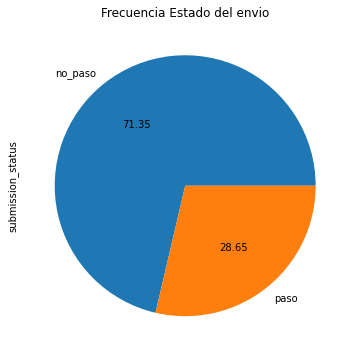

In [51]:
#Grafica del promedio del estatus de los ejercicios

plot = df['submission_status'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Frecuencia Estado del envio')

In [52]:
#Como se puede visualizar en los datos como en las graficas, la mayor cantidad de intentos tiene como estatus NO PASO, y esto se traduce en los intentos por ejercicio. 

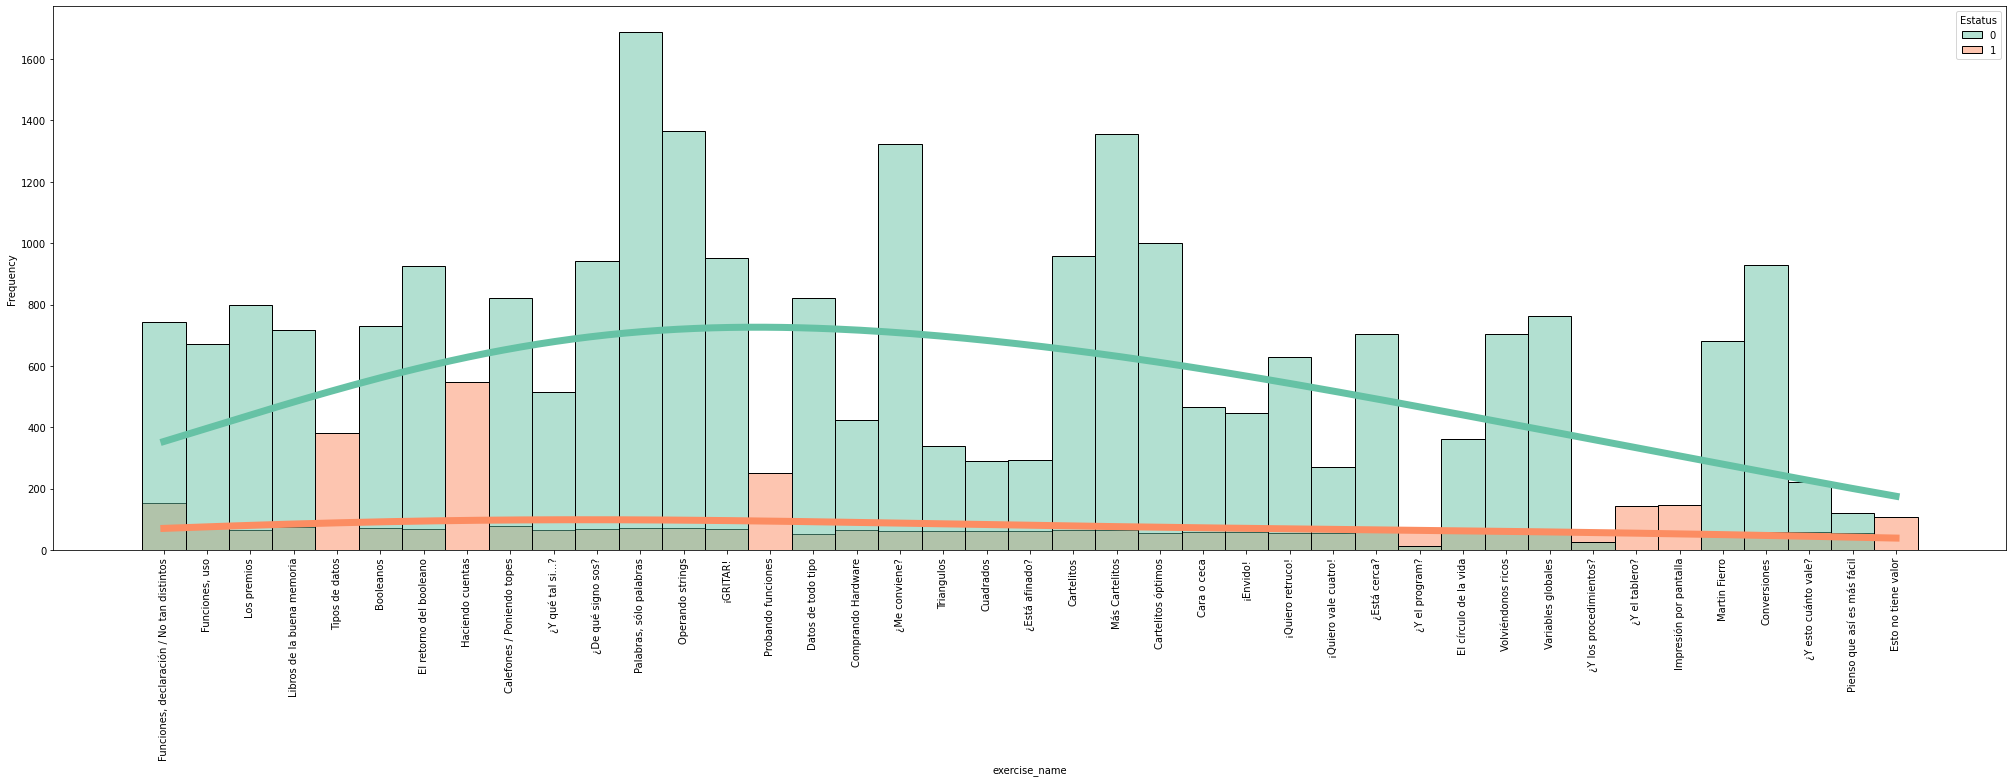

In [53]:
fig=plt.figure(figsize=(35,10))

seaborn.histplot(data=df,  # the long-formatted data frame
kde=True,     # draw kernel density estimation line as well
stat='frequency',  # the y-axis is the frequency
x='exercise_name',  # the column of dataframe we want to visualize
hue='Estatus',    # the categorical column
multiple='layer',   # how to lay out different categories's data
kde_kws={'bw_adjust':5},   # adjust the smoothness of kde curve
line_kws={'linewidth':7}, #adjust the aesthetic element of kde curve
palette='Set2')
plt.xticks(rotation=90);


In [54]:
#Hipotesis 3: Todos los ejercicios tienen igual cantidad de fallos.
#Con la siguiente tabla se comprueba que estos es FALSO

In [55]:
df[['student_uid', 'exercise_name']].groupby('exercise_name').describe()


student_uid  ...       
                                                count  ...    max
exercise_name                                          ...       
Booleanos                                      1275.0  ...  355.0
Calefones / Poniendo topes                     1423.0  ...  353.0
Cara o ceca                                     860.0  ...  353.0
Cartelitos                                     1574.0  ...  363.0
Cartelitos óptimos                             1597.0  ...  363.0
Comprando Hardware                              827.0  ...  355.0
Conversiones                                   1513.0  ...  359.0
Cuadrados                                       626.0  ...  353.0
Datos de todo tipo                             1331.0  ...  353.0
El círculo de la vida                           709.0  ...  359.0
El retorno del booleano                        1542.0  ...  353.0
Esto no tiene valor                             378.0  ...  359.0
Funciones, declaración / No tan distintos      1574.0  ...  359.0
Funciones, uso                                 1221.0  ...  353.0
Haciendo cuentas                               1909.0  ...  353.0
Impresión por pantalla                          509.0  ...  359.0
Libros de la buena memoria                     1273.0  ...  355.0
Los premios                                    1347.0  ...  353.0
Martin Fierro                                  1148.0  ...  359.0
Más Cartelitos                                 2125.0  ...  363.0
Operando strings                               2168.0  ...  358.0
Palabras, sólo palabras                        2610.0  ...  355.0
Pienso que así es más fácil                     365.0  ...  359.0
Probando funciones                              881.0  ...  353.0
Tipos de datos                                 1327.0  ...  353.0
Triangulos                                      690.0  ...  362.0
Variables globales                             1262.0  ...  359.0
Volviéndonos ricos                             1187.0  ...  359.0
¡Envido!                                        835.0  ...  353.0
¡GRITAR!                                       1571.0  ...  353.0
¡Quiero retruco!                               1071.0  ...  353.0
¡Quiero vale cuatro!                            571.0  ...  353.0
¿De qué signo sos?                             1553.0  ...  353.0
¿Está afinado?                                  626.0  ...  353.0
¿Está cerca?                                   1197.0  ...  353.0
¿Me conviene?                                  2066.0  ...  361.0
¿Y el program?                                  234.0  ...  359.0
¿Y el tablero?                                  504.0  ...  359.0
¿Y esto cuánto vale?                            512.0  ...  359.0
¿Y los procedimientos?                          236.0  ...  359.0
¿Y qué tal si...?                               956.0  ...  353.0

[41 rows x 8 columns]

In [56]:
df.groupby(['exercise_name', 'Estatus'])['student_uid'].count().unstack()

Estatus,0,1
exercise_name,,
Booleanos,1022.0,253.0
Calefones / Poniendo topes,1152.0,271.0
Cara o ceca,655.0,205.0
Cartelitos,1345.0,229.0
Cartelitos óptimos,1402.0,195.0
Comprando Hardware,595.0,232.0
Conversiones,1304.0,209.0
Cuadrados,408.0,218.0
Datos de todo tipo,1152.0,179.0


In [57]:
#Frecuencia estatus por envio
#0=No paso
#1=paso

In [58]:
Aprobo = df[df['submission_status'] == 'paso']
no_aprobo = df[df['submission_status'] == 'no_paso']


In [59]:
#Identificar ejercicio con más intentos en estatus [Paso]
Aprobo['exercise_name'].describe()

count                13519
unique                  41
top       Haciendo cuentas
freq                  1909
Name: exercise_name, dtype: object

In [60]:
#Identificar ejercicio con más intentos en estatus [No_paso]
no_aprobo['exercise_name'].describe()

count                       33664
unique                         35
top       Palabras, sólo palabras
freq                         2365
Name: exercise_name, dtype: object

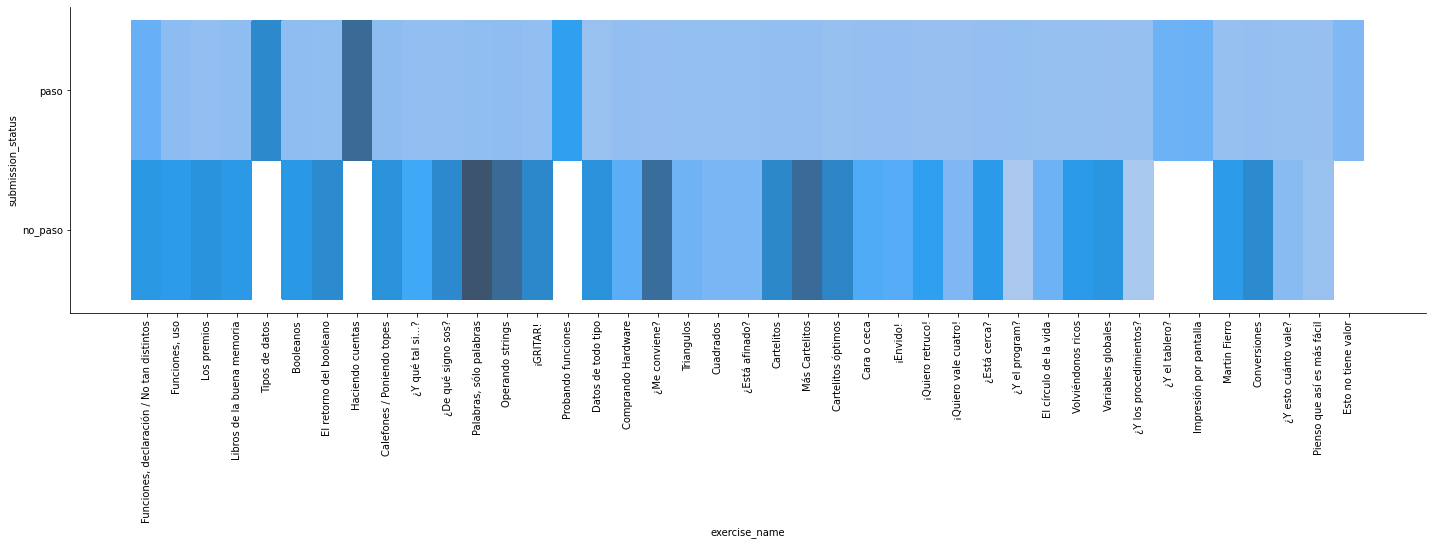

In [61]:
#Grafica de correlacion entre ejercicio y estatus
sns.displot(df, x="exercise_name", y="submission_status", aspect=4)
plt.xticks(rotation=90);


In [62]:
#Cantidad de envios realizado por usuario, total, paso, no paso 
contador_estatus_estudiante= pd.crosstab(df["student_uid"],df["submission_status"],margins=True) 
contador_estatus_estudiante

submission_status,no_paso,paso,All
student_uid,,,
-1,31,41,72
75,1,0,1
76,42,47,89
77,91,95,186
78,69,15,84
...,...,...,...
359,19,19,38
361,1,0,1
362,3,0,3


In [63]:
#Cantidad de envios correctos y totales por alumnos y media de estatus por alumno
data_esp = df.groupby('student_uid').agg({'Estatus':['sum', 'count', 'mean']})
data_esp

Estatus                
                sum count      mean
student_uid                        
-1               41    72  0.569444
 75               0     1  0.000000
 76              47    89  0.528090
 77              95   186  0.510753
 78              15    84  0.178571
...             ...   ...       ...
 358              1     6  0.166667
 359             19    38  0.500000
 361              0     1  0.000000
 362              0     3  0.000000
 363              1    19  0.052632

[286 rows x 3 columns]

In [64]:
# Cantidad de ëjercicios que intento resolver cada estudiante .
df_student_exe = df.groupby(['student_uid']).agg({'exercise_name': (lambda x: len(set(x)))})
df_student_exe

,exercise_name
student_uid,
-1,29
75,1
76,36
77,40
78,9
...,...
358,1
359,16
361,1


In [65]:
df_student_exe.describe()

,exercise_name
count,286.000000
mean,31.769231
std,13.742847
min,1.000000
25%,22.250000
50%,41.000000
75%,41.000000
max,41.000000


In [66]:
#Cantidad de ejercicios aprobados y desapronbados por alumno
df_student_estatus = df.groupby(['student_uid','submission_status' ]).agg({'exercise_name': (lambda x: len(set(x)))})
df_student_estatus

exercise_name
student_uid submission_status               
-1          no_paso                       13
            paso                          29
 75         no_paso                        1
 76         no_paso                       14
            paso                          33
...                                      ...
 359        paso                          15
 361        no_paso                        1
 362        no_paso                        1
 363        no_paso                        3
            paso                           1

[565 rows x 1 columns]

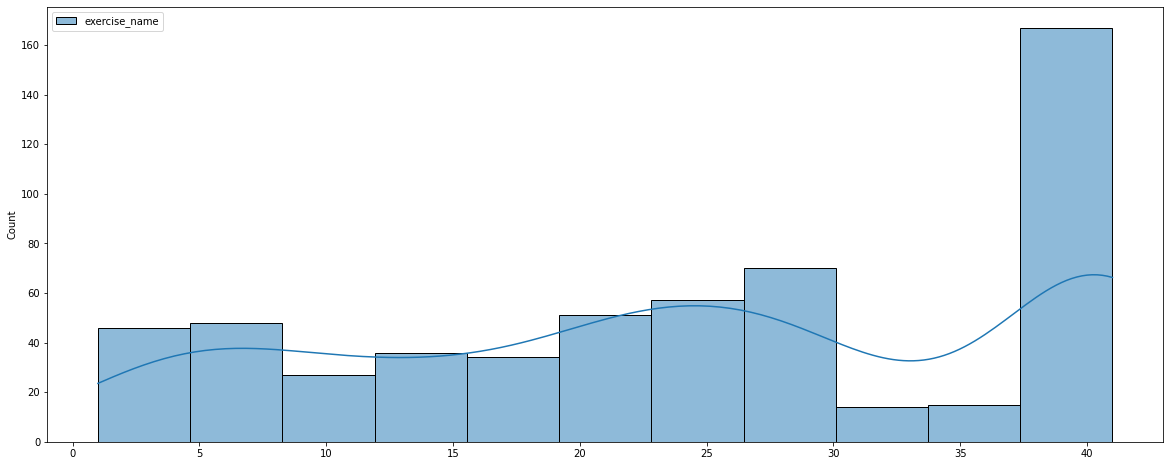

In [67]:
plt.figure(figsize=(20, 8))
seaborn.histplot(df_student_estatus, kde=True)

In [68]:
df_student_estatus.describe()

,exercise_name
count,565.000000
mean,24.732743
std,13.150563
min,1.000000
25%,14.000000
50%,25.000000
75%,40.000000
max,41.000000


In [69]:
df[['exercise_name', 'student_uid']].groupby('student_uid').describe()


exercise_name  ...     
                    count  ... freq
student_uid                ...     
-1                     72  ...   11
 75                     1  ...    1
 76                    89  ...   10
 77                   186  ...   31
 78                    84  ...   38
...                   ...  ...  ...
 358                    6  ...    6
 359                   38  ...    7
 361                    1  ...    1
 362                    3  ...    3
 363                   19  ...   12

[286 rows x 4 columns]

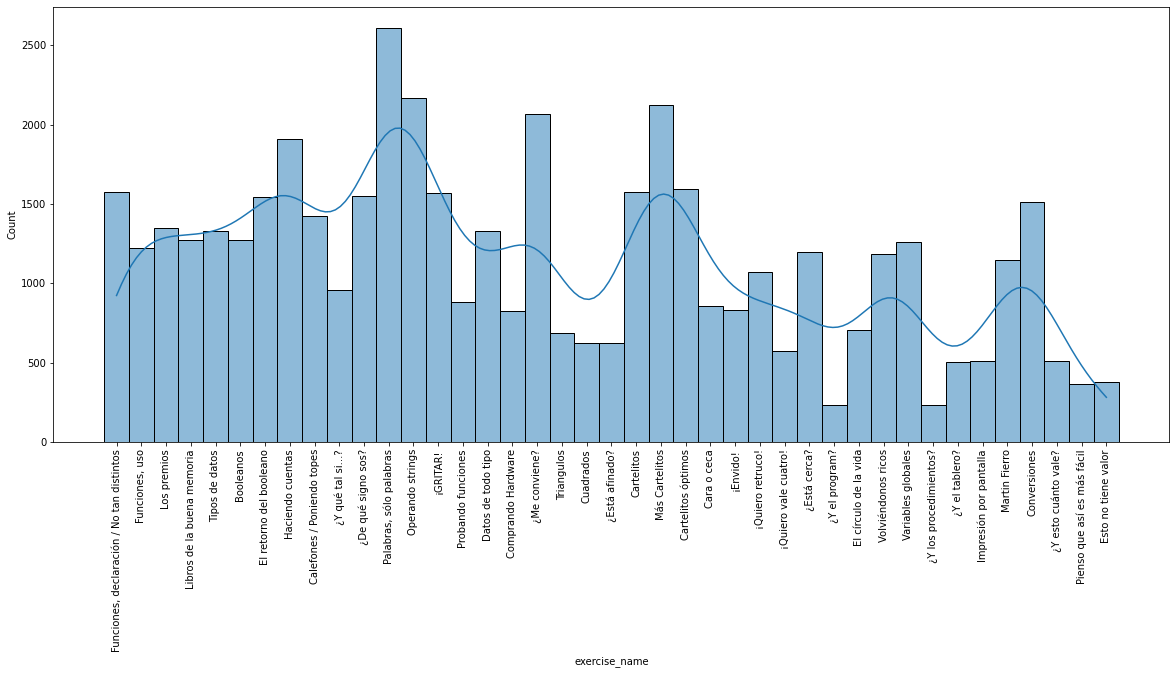

In [86]:
plt.figure(figsize=(20, 8))
seaborn.histplot(df.exercise_name, kde=True)
plt.xticks(rotation=90);


In [70]:
#Identificar rango: mayor cantidad de envios en status paso, no paso y mayor y menor cantidad de envios realizados por un estudiante
max_cantidad_envios_correctos = data_esp.max()
min_cantidad_envios_correctos = data_esp.min()

print(max_cantidad_envios_correctos, min_cantidad_envios_correctos)

Estatus  sum       95.0
         count    660.0
         mean       1.0
dtype: float64 Estatus  sum      0.0
         count    1.0
         mean     0.0
dtype: float64


In [71]:
# El alumno que hizo mayor cantidad de envios correctos es de 95 y la mayor cantidad de envios totales de un alumno es de 660
#El alumno que hizo menor cantidad de envios es de 1 envio y exiten alumnos que no tienen envios correctos

In [72]:
iqr = max_cantidad_envios_correctos.quantile(0.75) - max_cantidad_envios_correctos.quantile(0.25)
print(iqr)

329.5


In [76]:
#Estudiante con 100% de envios correctos
df_promedio_por_ej_por_std=df.groupby('student_uid').submission_status.value_counts() \
  .unstack(fill_value=0).reset_index()
df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['no_paso']==0]

submission_status,student_uid,no_paso,paso
173,247,0,7


In [83]:
#Estudiante con 100% de envios incorrectos

df_promedio_por_ej_por_std=df.groupby('student_uid').submission_status.value_counts() \
  .unstack(fill_value=0).reset_index()
df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['paso']==0]

submission_status,student_uid,no_paso,paso
1,75,1,0
57,131,6,0
68,142,1,0
69,143,3,0
283,361,1,0
284,362,3,0


In [89]:
df_promedio_por_ej_por_std['grupo_submission_status']=[ 'no_paso' if no_paso>paso else 'paso' for no_paso,paso,student_uid in zip(df_promedio_por_ej_por_std['no_paso'],df_promedio_por_ej_por_std['paso'],df_promedio_por_ej_por_std['student_uid'])]

In [90]:
# Cantidad de alumnos con mayor cantidad de envios no_paso que paso y lo opuesto
df_promedio_por_ej_por_std['grupo_submission_status'].value_counts()

no_paso    235
paso        51
Name: grupo_submission_status, dtype: int64

In [118]:
#Se crean dos grupos:
#Un grupo_a de alumnos con mas envio correctos, que incorrectos o iguales.
#Un grupo_b con mayor cantidad de envios incorrectos que correctos.

grupo_a=df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['grupo_submission_status']=='paso']
grupo_b=df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['grupo_submission_status']=='no_paso']



In [116]:
#probabilidad de sacar estatus no paso - paso, por ejercicio ante un envio
Prob_ejer_grupo_b=(df.groupby(['submission_status', 'exercise_name']).count() / df.groupby('exercise_name').count())['student_uid']
print(Prob_ejer)

submission_status  exercise_name             
no_paso            Booleanos                     0.801569
                   Calefones / Poniendo topes    0.809557
                   Cara o ceca                   0.761628
                   Cartelitos                    0.854511
                   Cartelitos óptimos            0.877896
                                                   ...   
paso               ¿Y el program?                0.914530
                   ¿Y el tablero?                1.000000
                   ¿Y esto cuánto vale?          0.390625
                   ¿Y los procedimientos?        0.847458
                   ¿Y qué tal si...?             0.242678
Name: student_uid, Length: 76, dtype: float64


In [126]:
array_std_id_paso=[ student_uid for student_uid, ex_status in zip(df_promedio_por_ej_por_std['student_uid'],df_promedio_por_ej_por_std['grupo_submission_status']) if ex_status=='paso' ]

In [127]:
df_std_id_paso=df[ df['student_uid'].isin(array_std_id_paso)]

In [128]:
df_ex_name=df_std_id_paso.groupby(['exercise_name']).submission_status.value_counts() \
  .unstack(fill_value=0).reset_index()

In [129]:
#Probabilidad de pasar cada ejercicio siendo del grupo_a
df_ex_name['prom_no_paso']=[no_paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name['paso'],df_ex_name['no_paso'])]
df_ex_name['prom_paso']=[paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name['paso'],df_ex_name['no_paso'])]
df_ex_name

submission_status,exercise_name,no_paso,paso,prom_no_paso,prom_paso
0,Booleanos,84,41,0.672000,0.328000
1,Calefones / Poniendo topes,65,50,0.565217,0.434783
2,Cara o ceca,26,32,0.448276,0.551724
3,Cartelitos,55,34,0.617978,0.382022
4,Cartelitos óptimos,96,29,0.768000,0.232000
5,Comprando Hardware,34,32,0.515152,0.484848
6,Conversiones,71,30,0.702970,0.297030
7,Cuadrados,14,34,0.291667,0.708333
8,Datos de todo tipo,91,25,0.784483,0.215517
9,El círculo de la vida,15,28,0.348837,0.651163


In [143]:
#Frecuencia de Estatus y probabilidad de aproba o desaprobar del grupo a por index de ejercicio
df_ex_name.plot_bokeh(kind='barh',stacked=True);

In [ ]:
#analisis de prob de pasar cada tipo de ejercicio si se es del grupo b

array_std_id_no_paso=[ student_uid for student_uid, ex_status in zip(df_promedio_por_ej_por_std['student_uid'],df_promedio_por_ej_por_std['grupo_submission_status']) if ex_status=='no_paso' ]

df_std_id_no_paso=df[ df['student_uid'].isin(array_std_id_no_paso)]

df_ex_name_no_paso=df_std_id_no_paso.groupby(['exercise_name']).submission_status.value_counts() \
  .unstack(fill_value=0).reset_index()

df_ex_name_no_paso['prom_no_paso']=[no_paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name_no_paso['paso'],df_ex_name_no_paso['no_paso'])]
df_ex_name_no_paso['prom_paso']=[paso/(no_paso+paso) for paso,no_paso in zip(df_ex_name_no_paso['paso'],df_ex_name_no_paso['no_paso'])]

df_ex_name_no_paso

In [144]:
#Frecuencia de Estatus y probabilidad de aproba o desaprobar del grupo a por index de ejercicio
df_ex_name_no_paso.plot_bokeh(kind='barh',stacked=True);

In [132]:
#Medias de las probabilidades de pasar un ejercicio por grupo
mean_a_prom_grupo_a= df_ex_name['prom_paso'].mean() # media de probabilidad de pasar un ej del grupo paso
mean_b_prom_grupo_b=df_ex_name_no_paso['prom_paso'].mean() # media de probabilidad de pasar un ej del grupo no_paso
print(mean_a_prom_grupo_a, mean_b_prom_grupo_b)

0.5704409766221796 0.349290133183828


In [141]:
#Falta el analisis de las diferencias de las probabilidades del paso entre los dos grupos, estimaciones, etc
diferencia_prob_paso= [ {'exercise_name':ex_name, 'diferencia_prob':prob_paso_a-prob_paso_b } for prob_paso_a, prob_paso_b, ex_name in zip(df_ex_name['prom_paso'],df_ex_name_no_paso['prom_paso'],df_ex_name_no_paso['exercise_name']) ]
diferencia_prob_paso

[{'diferencia_prob': 0.1436521739130435, 'exercise_name': 'Booleanos'},
 {'diferencia_prob': 0.2658223640473341,
  'exercise_name': 'Calefones / Poniendo topes'},
 {'diferencia_prob': 0.3360134147390145, 'exercise_name': 'Cara o ceca'},
 {'diferencia_prob': 0.250709340596981, 'exercise_name': 'Cartelitos'},
 {'diferencia_prob': 0.11922826086956523,
  'exercise_name': 'Cartelitos óptimos'},
 {'diferencia_prob': 0.22203639549237447,
  'exercise_name': 'Comprando Hardware'},
 {'diferencia_prob': 0.17025916472667096, 'exercise_name': 'Conversiones'},
 {'diferencia_prob': 0.3899942329873126, 'exercise_name': 'Cuadrados'},
 {'diferencia_prob': 0.0887682701858947,
  'exercise_name': 'Datos de todo tipo'},
 {'diferencia_prob': 0.39140303093791473,
  'exercise_name': 'El círculo de la vida'},
 {'diferencia_prob': 0.28370660030809336,
  'exercise_name': 'El retorno del booleano'},
 {'diferencia_prob': 0.0, 'exercise_name': 'Esto no tiene valor'},
 {'diferencia_prob': 0.15124335314357207,
  'exer

In [ ]:
# Se puede concluir que cada grupo tiene probabilidades disntintas para pasar los ejercicios, siendo los alumnos del grupo a tiene mayor probabilidad de pasar los ejercicios, respecto a los del grupo b. 

In [153]:
df_ex_name_date=df.groupby(['exercise_name', 'date']).submission_status.value_counts().unstack(fill_value=0).reset_index()



In [155]:
ejercicios_mas_frecuencia_data=df_ex_name_date.groupby('exercise_name')['date'].count().sort_values(ascending=False)
ejercicios_mas_frecuencia_data

exercise_name
¿Me conviene?                                105
Cartelitos óptimos                           102
Palabras, sólo palabras                       99
Más Cartelitos                                98
Cartelitos                                    98
Martin Fierro                                 95
Conversiones                                  95
Tipos de datos                                94
¡Envido!                                      94
¡Quiero retruco!                              94
Funciones, declaración / No tan distintos     94
Comprando Hardware                            94
Cara o ceca                                   93
Booleanos                                     93
Funciones, uso                                92
Variables globales                            92
Los premios                                   92
Volviéndonos ricos                            91
¿Está cerca?                                  91
Libros de la buena memoria                    90
Operan

In [156]:
ejercicios_mas_frecuencia_data.plot_bokeh(kind='barh',stacked=True);

In [ ]:
##DE ACA HACIA ABAJO FALTA ANALISIS##

In [134]:
#EstimacionPuntual
estimacion_puntual = mean_a_prom_grupo_a - mean_b_prom_grupo_b
estimacion_puntual


0.22115084343835162

In [113]:
#Varianza y desvio por grupo
#no tener en cuenta el student_uid
n = len(grupo_a)
m = len(grupo_b)

varianza_grupo_a = grupo_a.var()
print("la varianza del grupo A es: ", varianza_grupo_a)
varianza_grupo_b = grupo_b.var()
print("la varianza del grupo B es: ", varianza_grupo_b)

desvst_grupo_a = grupo_a.std()
print("la desviación estandar del grupo A es: ", desvst_grupo_a)
desvst_grupo_b = grupo_b.std()
print("la desviación estandar del grupo B es: ", desvst_grupo_b)

la varianza del grupo A es:  submission_status
student_uid    7447.656471
no_paso         401.198431
paso            424.223529
dtype: float64
la varianza del grupo B es:  submission_status
student_uid    6867.293581
no_paso        8952.761520
paso            430.898527
dtype: float64
la desviación estandar del grupo A es:  submission_status
student_uid    86.299806
no_paso        20.029938
paso           20.596687
dtype: float64
la desviación estandar del grupo B es:  submission_status
student_uid    82.869135
no_paso        94.619034
paso           20.758095
dtype: float64
